## 12-4. Hello Scikit-learn


In [1]:
import sklearn
print(sklearn.__version__)

0.23.0


## 12-6. 사이킷런의 주요 모듈 (2) 회귀 모델 실습


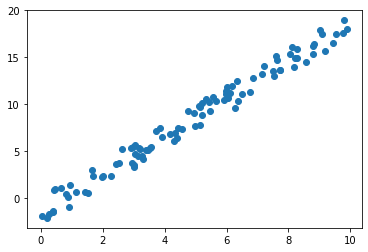

In [2]:
# 회귀 모델을 통해 실습

import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [3]:
# 입력 데이터 및 정답 데이터 확인
print(x.shape)
print(y.shape)

(100,)
(100,)


In [4]:
test = np.random.RandomState(3)
test

RandomState(MT19937) at 0x7F9A868E5160

In [6]:
import numpy as np
"""
np.random.seed(SEED) 로 random을 생성하게 될 경우, 
"""
def random_int_gen_with_global_seed(size=10, seed=0):
    np.random.seed(seed)
    return np.random.random(size=size)

np.random.seed(3)
# seed를 3으로 세팅하고, random number를 2개 뽑습니다.
A = list(np.random.random(size=4))

# random_int_gen_with_global_seed 내에서
# 같은 seed를 세팅하고, random number를 2개 뽑고.
# 함수 밖에서, seed를 세팅하지 않고, 2개를 더 뽑아서 합칩니다.
# 즉, 함수 안에서 반을, 함수 밖에서 반을 뽑는 것이죠.
B = list(random_int_gen_with_global_seed(2, seed=3))
B+= list(np.random.random(size=2))

# 그리고, A, B를 비교해보면 완전히 같은 것을 알 수 있습니다. 
# 즉, 함수 내에서 np.random.seed() 를 실행하여 seed를 새롭게 설정하면, 
# 함수 밖에서도 seed가 다시 세팅된다는 것이죠.
print("=="*30)
print(f"A: {A}")
print(f"B: {B}")
assert A==B
print("==" * 30)

A: [0.5507979025745755, 0.7081478226181048, 0.2909047389129443, 0.510827605197663]
B: [0.5507979025745755, 0.7081478226181048, 0.2909047389129443, 0.510827605197663]


In [12]:
import numpy as np
"""
np.random.seed(SEED) 로 random을 생성하게 될 경우, 
"""
def random_int_gen_with_local_seed(size=10, seed=0):
    # 내부에 같은 seed를 지정해준 random generator object를 만들고
    # 이 객체의 method를 통해 난수를 생성한다.
    # 이렇게 할 경우, 전체 seed에 영향을 미치지 않으므로 효과적으로 random number를 뽑을 수있다.
    Rand = np.random.RandomState(seed=seed)
    return Rand.random(size=size)

# global seed를 3으로 설정하고
# 4개의 수를 뽑습니다.
np.random.seed(3)
global_seed3_num1234 = np.random.random(size=4)

# 함수내에서 사용하는 local seed도 seed를 동일하게 설정하고, 6개의 수를 뽑습니다.
local_seed3_num123456 = random_int_gen_with_local_seed(6, seed=4)

# global seed에서 수를 2개 더 뽑습니다.
global_seed3_num56 = np.random.random(size=2)

global_seed3_num123456 = list(global_seed3_num1234) + list(global_seed3_num56)
global_seed3_num123456 = np.array(global_seed3_num123456)

# 결과를 보면, global seed에서 4개, 2개를 뽑아서 합친 값과 
# local seed에서 6개를 뽑아낸 값이 같은 것을 알 수 있습니다. 
# 즉, local에서의 seed 변화가, 외부에 영향을 끼치지 않은 것이죠.
print("=="*30)
print(f"global seed num: {global_seed3_num123456}")
print(f"local  seed num: {local_seed3_num123456}")
print("=="*30)

global seed num: [0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309]
local  seed num: [0.96702984 0.54723225 0.97268436 0.71481599 0.69772882 0.2160895 ]


In [18]:
import numpy as np
"""
np.random.seed(SEED) 로 random을 생성하게 될 경우, 
"""
def random_int_gen_with_local_seed(size=10, seed=0):
    # 내부에 같은 seed를 지정해준 random generator object를 만들고
    # 이 객체의 method를 통해 난수를 생성한다.
    # 이렇게 할 경우, 전체 seed에 영향을 미치지 않으므로 효과적으로 random number를 뽑을 수있다.
    Rand = np.random.RandomState(seed=seed)
    return Rand.random(size=size)

# global seed를 3으로 설정하고
# 4개의 수를 뽑습니다.
np.random.seed(3)
global_seed3_num1234 = np.random.random(size=4)

# 함수내에서 사용하는 local seed도 seed를 동일하게 설정하고, 6개의 수를 뽑습니다.
local_seed3_num123456 = random_int_gen_with_local_seed(6, seed=4)

# global seed에서 수를 2개 더 뽑습니다.
global_seed3_num56 = np.random.random(size=2)

global_seed3_num123456 = list(global_seed3_num1234) + list(global_seed3_num56)
global_seed3_num123456 = np.array(global_seed3_num123456)

another_num = np.random.random(6)
another_num_2 = np.random.random(6)


# 결과를 보면, global seed에서 4개, 2개를 뽑아서 합친 값과 
# local seed에서 6개를 뽑아낸 값이 같은 것을 알 수 있습니다. 
# 즉, local에서의 seed 변화가, 외부에 영향을 끼치지 않은 것이죠.
print("=="*30)
print(f"global seed num: {global_seed3_num123456}")
print(f"local  seed num: {local_seed3_num123456}")
print(f"another with global: {another_num}")
print(f"another with global: {another_num_2}")

print("=="*30)

global seed num: [0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309]
local  seed num: [0.96702984 0.54723225 0.97268436 0.71481599 0.69772882 0.2160895 ]
another with global: [0.12558531 0.20724288 0.0514672  0.44080984 0.02987621 0.45683322]
another with global: [0.64914405 0.27848728 0.6762549  0.59086282 0.02398188 0.55885409]


In [23]:
# 모델 만들기

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [24]:
# ! 에러 발생
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[7.71320643 0.20751949 6.33648235 7.48803883 4.98507012 2.24796646
 1.98062865 7.60530712 1.69110837 0.88339814 6.85359818 9.53393346
 0.03948266 5.12192263 8.12620962 6.12526067 7.21755317 2.91876068
 9.17774123 7.14575783 5.42544368 1.42170048 3.7334076  6.74133615
 4.41833174 4.34013993 6.17766978 5.13138243 6.50397182 6.01038953
 8.05223197 5.21647152 9.08648881 3.19236089 0.90459349 3.00700057
 1.13984362 8.28681326 0.46896319 6.26287148 5.47586156 8.19286996
 1.9894754  8.56850302 3.51652639 7.54647692 2.95961707 8.8393648
 3.25511638 1.65015898 3.92529244 0.93460375 8.21105658 1.5115202
 3.84114449 9.44260712 9.87625475 4.56304547 8.26122844 2.51374134
 5.97371648 9.0283176  5.34557949 5.90201363 0.39281767 3.57181759
 0.7961309  3.05459918 3.30719312 7.73830296 0.39959209 4.29492178
 3.14926872 6.36491143 3.4634715  0.43097356 8.79915175 7.63240587
 8.78096643 4.17509144 6.05577564 5.13466627 5.97836648 2.62215661
 3.00871309 0.25399782 3.03062561 2.42075875 5.57578189 5.6550702
 4.75132247 2.92797976 0.64251061 9.78819146 3.39707844 4.95048631
 9.77080726 4.40773825 3.18272805 5.19796986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
X = x.reshape(100,1)

In [26]:
model.fit(X, y)

LinearRegression()

In [27]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100, 1)
y_new = model.predict(X_new)
y_new

array([-3.5035171 , -3.25845808, -3.01339905, -2.76834003, -2.52328101,
       -2.27822198, -2.03316296, -1.78810393, -1.54304491, -1.29798588,
       -1.05292686, -0.80786783, -0.56280881, -0.31774978, -0.07269076,
        0.17236826,  0.41742729,  0.66248631,  0.90754534,  1.15260436,
        1.39766339,  1.64272241,  1.88778144,  2.13284046,  2.37789949,
        2.62295851,  2.86801754,  3.11307656,  3.35813558,  3.60319461,
        3.84825363,  4.09331266,  4.33837168,  4.58343071,  4.82848973,
        5.07354876,  5.31860778,  5.56366681,  5.80872583,  6.05378485,
        6.29884388,  6.5439029 ,  6.78896193,  7.03402095,  7.27907998,
        7.524139  ,  7.76919803,  8.01425705,  8.25931608,  8.5043751 ,
        8.74943413,  8.99449315,  9.23955217,  9.4846112 ,  9.72967022,
        9.97472925, 10.21978827, 10.4648473 , 10.70990632, 10.95496535,
       11.20002437, 11.4450834 , 11.69014242, 11.93520144, 12.18026047,
       12.42531949, 12.67037852, 12.91543754, 13.16049657, 13.40

In [38]:
# DJ's version RMSE
np.sqrt(((y - y_new)**2).sum()/len(y))

9.299028215052264

In [39]:
# 예측값 RMSE로 평가해보기

from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y,y_new))
print(error)

9.299028215052264


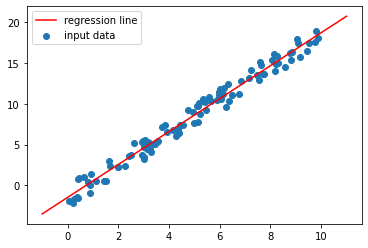

In [40]:
# 데이터 지표로 확인하기
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')
plt.legend()

## 12-7. 사이킷런의 주요 모듈 (3) datasets 모듈


### datasets.load_wine() 뜯어보기


In [41]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils.Bunch

In [43]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [44]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### 1. data



In [45]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [46]:
data.data.shape

(178, 13)

In [47]:
data.data.shape

(178, 13)

#### 2. target



In [48]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [49]:
data.target.shape

(178,)

#### 3. feature_names



In [50]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [51]:
len(data.feature_names)

13

#### 4. target_names



In [52]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 5. DESCR



In [53]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 12-8. 사이킷런의 주요 모듈 (4) 사이킷런 데이터셋을 이용한 분류 문제 실습


In [55]:
import pandas as pd

pd.DataFrame(data=data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### 머신러닝

In [56]:
X = data.data
y = data.target

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [58]:
model.fit(X,y)

RandomForestClassifier()

In [59]:
y_pred = model.predict(X)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다. 
print(classification_report(y, y_pred))
#정확도를 출력합니다. 
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


## 12-9. 사이킷런의 주요 모듈 (5) Estimator


## 12-10. 훈련 데이터와 테스트 데이터 분리하기


#### 훈련 데이터와 테스트 데이터 직접 분리하기


In [61]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [71]:
# DJ's version
train_len = round(len(data.data) * 0.8)
test_len = len(data.data) - round(len(data.data) * 0.8)

X_m_train = data.data[:train_len]
X_m_test = data.data[-test_len:]

y_m_train = data.target[:train_len]
y_m_test = data.target[-test_len:]

print("X_m_train shape:", X_m_train.shape)
print("X_m_test shape:", X_m_test.shape)
print("y_m_train shape:", y_m_train.shape)
print("y_m_test shape:", y_m_test.shape)

X_m_train shape: (142, 13)
X_m_test shape: (36, 13)
y_m_train shape: (142,)
y_m_test shape: (36,)


In [72]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [73]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222


#### train_test_split() 사용해서 분리하기


In [83]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
result

[array([[1.434e+01, 1.680e+00, 2.700e+00, ..., 5.700e-01, 1.960e+00,
         6.600e+02],
        [1.253e+01, 5.510e+00, 2.640e+00, ..., 8.200e-01, 1.690e+00,
         5.150e+02],
        [1.237e+01, 1.070e+00, 2.100e+00, ..., 1.040e+00, 2.770e+00,
         6.600e+02],
        ...,
        [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
         1.547e+03],
        [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
         4.950e+02],
        [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
         4.380e+02]]),
 array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
         1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
         1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
         8.450000e+02],
        [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
         1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
         1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
         1.080000e+03],
       

In [80]:
result_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
result[0] == result_1[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [85]:
print(type(result))
print(len(result))

<class 'list'>
4


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# 데이터셋 로드하기
# [[your code]
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
# 훈련용 데이터셋 나누기
# [[your code]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=77)
# 훈련하기
# [[your code]
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# 예측하기
# [[your code]
y_pred = rf_model.predict(X_test)

# 정답률 출력하기
# [[your code]
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 12-11. 마무리
